In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Pre-requisite = python - 3.6 and tensorflow - 2.0 +

print(tensorflow.__version__)

2.13.0


In [3]:
# Loading the data

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

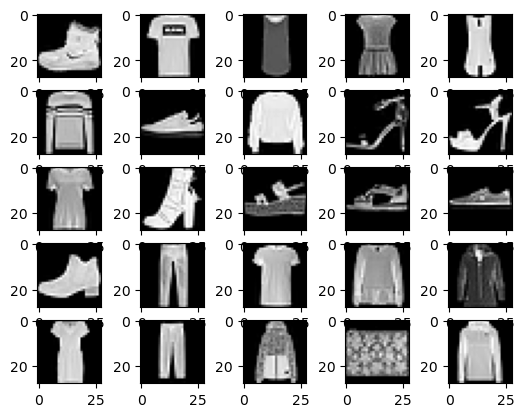

<Figure size 1200x800 with 0 Axes>

In [4]:
# Visualizing the Dataset

for i in range(25):
    # define subplot
    plt.subplot(5, 5, i+1)
    # plot raw pixel data
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the figure
plt.figure(figsize=(12,8))
plt.show()

In [5]:
# Normalizing the images

X_train = X_train/255
X_test = X_test/255

In [6]:
# Building the model

model = Sequential([

    #flattening the images
    Flatten(input_shape=(28,28)),

    #adding first hidden layer
    Dense(256, activation='relu'),

    #adding second hidden layer
    Dense(128, activation='relu'),

    #adding third hidden layer
    Dense(64, activation='relu'),

    #adding output layer
    Dense(10, activation='softmax')
])

In [7]:
# Compiling the model

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#fitting the model

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4875 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3627 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3285 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3039 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2870 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2735 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2600 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2516 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2385 - accuracy: 0.9099
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.229

In [8]:
# Evaluating the model

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8844


[0.34627559781074524, 0.8844000101089478]

In [ ]:
'''
Now lets tune the following hyperparameter in model -

1. Number of hidden layers
2. Number of neurons in each hidden layers
3. Learning rate
4. Activation Function
'''


'\nNow lets tune the following hyperparameter in model -\n\n1. Number of hidden layers\n2. Number of neurons in each hidden layers\n3. Learning rate\n4. Activation Function\n'

In [9]:
# Use this command to install Keras tuner

! pip install --q keras-tuner

In [10]:
# Installing the required libraries

from tensorflow import keras
from keras_tuner import RandomSearch

In [11]:
# Defining function to biuld the model

def build_model(hp):          # hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing range for number of neurons in a hidden layer
    model.add(Dense(units = hp.Int('num_of_neurons', min_value = 32, max_value = 512, step = 32),
                                    activation ='relu'))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compiling the model
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values = [1e-2, 1e-3, 1e-4])),
                  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [12]:
#feeding the model and parameters to Random Search

tuner = RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 5,
                    executions_per_trial = 3,
                    directory = 'tuner1',
                    project_name = 'Clothing')

# So this will run for (5*3)= 15 times with 10 epochs

In [13]:
# This tells us how many hyperparameter we are tuning
# in our case it's 2 = neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [14]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 05m 42s]
val_accuracy: 0.8764666517575582

Best val_accuracy So Far: 0.8764666517575582
Total elapsed time: 00h 15m 28s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_neurons: 384
learning_rate: 0.001
Score: 0.8880000114440918
Trial summary
Hyperparameters:
num_of_neurons: 224
learning_rate: 0.001
Score: 0.8853999773661295
Trial summary
Hyperparameters:
num_of_neurons: 352
learning_rate: 0.0001
Score: 0.8758000135421753
Trial summary
Hyperparameters:
num_of_neurons: 224
learning_rate: 0.0001
Score: 0.8705000082651774
Trial summary
Hyperparameters:
num_of_neurons: 96
learning_rate: 0.01
Score: 0.8511333266894022


In [ ]:
'''
Now lets tune some more parameters -

Now we will provide the range of the number of the layers to be
used in the model which is between 2 to 20
'''

'\nNow lets tune some more parameters - \nNow we will provide the range of the number of the layers to be \nused in the model which is between 2 to 20\n'

In [ ]:
def build_model(hp):                 # Hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape = (28,28)))

    # Providing the range for hidden layers
    for i in range(hp.Int('num_of_layers', 2, 20)):
        # Providing range for number of neurons in hidden layers
        model.add(Dense(units = hp.Int('num_of_neurons'+ str(i), min_value=32, max_value = 512, step = 32),
                                    activation = 'relu'))

    model.add(Dense(10, activation = 'softmax'))    # Output layer

    #  Compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),   #tuning learning rate
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Feeding the model and parameters to Random Search

tuner=RandomSearch(build_model,
                  objective = 'val_accuracy',
                  max_trials = 5,
                  executions_per_trial = 3,
                  directory = 'project',
                  project_name = 'Clothing')

In [ ]:
# Tells us how many hyperparameters we are tuning
# in our case it's 3 = layers, neurons, learning rate

tuner.search_space_summary()

Search space summary
Default search space size: 4
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Fitting the tuner on train dataset

tuner.search(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Trial 5 Complete [00h 03m 40s]
val_accuracy: 0.7541333436965942

Best val_accuracy So Far: 0.887499988079071
Total elapsed time: 00h 15m 49s
INFO:tensorflow:Oracle triggered exit


In [ ]:
# We can see the hyperparameters which is been selected by KerasTuner

tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_of_layers: 2
num_of_neurons0: 448
num_of_neurons1: 480
learning_rate: 0.001
Score: 0.887499988079071
Trial summary
Hyperparameters:
num_of_layers: 3
num_of_neurons0: 448
num_of_neurons1: 352
learning_rate: 0.001
num_of_neurons2: 128
num_of_neurons3: 192
num_of_neurons4: 416
num_of_neurons5: 32
num_of_neurons6: 160
num_of_neurons7: 128
num_of_neurons8: 320
Score: 0.8860666751861572
Trial summary
Hyperparameters:
num_of_layers: 2
num_of_neurons0: 128
num_of_neurons1: 160
learning_rate: 0.001
num_of_neurons2: 352
num_of_neurons3: 320
num_of_neurons4: 480
num_of_neurons5: 224
num_of_neurons6: 288
num_of_neurons7: 160
num_of_neurons8: 512
Score: 0.8860333363215128
Trial summary
Hyperparameters:
num_of_layers: 9
num_of_neurons0: 416
num_of_neurons1: 384
learning_rate: 0.0001
num_of_neurons2: 32
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neu